In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Precisão de 2 casas decimais:
pd.set_option('float_format', '{:.3f}'.format)

df = pd.read_csv('./data_new_graphics/dataset_pca.csv', sep=",")
df

,soil_effluent_nitrogen,soil_effluent_phosphorus,soil_effluent_potassium,soil_effluent_calcium,soil_effluent_culphur,soil_effluent_sodium,soil_effluent_magnesium,soil_effluent_aluminium
0,0.000,17.500,1.630,30.800,11.750,0.010,13.800,0.000
1,0.000,24.000,1.530,30.500,9.500,0.040,14.300,0.000
2,0.000,22.000,1.530,33.800,10.250,0.080,15.000,0.000
3,0.000,17.500,2.150,33.500,9.250,0.080,13.300,0.000
4,0.000,19.000,2.230,27.000,11.750,0.100,11.500,0.000
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,61.200,5.900,14.200,17.700,2.400,32.000,1.800,0.200
7,122.100,11.800,28.300,35.200,4.700,63.900,3.700,0.400
8,182.500,17.700,42.300,52.600,7.000,95.400,5.500,0.600
9,243.300,23.600,56.400,70.200,9.300,127.200,7.300,0.800


In [4]:
# Remover linhas com valores ausentes (se houver)
df_cleaned = df.dropna()
df_cleaned

,soil_effluent_nitrogen,soil_effluent_phosphorus,soil_effluent_potassium,soil_effluent_calcium,soil_effluent_culphur,soil_effluent_sodium,soil_effluent_magnesium,soil_effluent_aluminium
0,0.000,17.500,1.630,30.800,11.750,0.010,13.800,0.000
1,0.000,24.000,1.530,30.500,9.500,0.040,14.300,0.000
2,0.000,22.000,1.530,33.800,10.250,0.080,15.000,0.000
3,0.000,17.500,2.150,33.500,9.250,0.080,13.300,0.000
4,0.000,19.000,2.230,27.000,11.750,0.100,11.500,0.000
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,61.200,5.900,14.200,17.700,2.400,32.000,1.800,0.200
7,122.100,11.800,28.300,35.200,4.700,63.900,3.700,0.400
8,182.500,17.700,42.300,52.600,7.000,95.400,5.500,0.600
9,243.300,23.600,56.400,70.200,9.300,127.200,7.300,0.800


In [8]:
# Separar os dados para análise PCA (somente colunas numéricas)
X = df_cleaned.values

In [9]:
# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Aplicar PCA
pca = PCA(n_components=None)  # Manter todos os componentes principais
X_pca = pca.fit_transform(X_scaled)

In [12]:
# Variância explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.05190362e-01, 3.81608993e-01, 9.43946403e-03, 3.54763709e-03,
       2.12291224e-04, 9.77887607e-07, 2.69496831e-07, 5.03739947e-09])

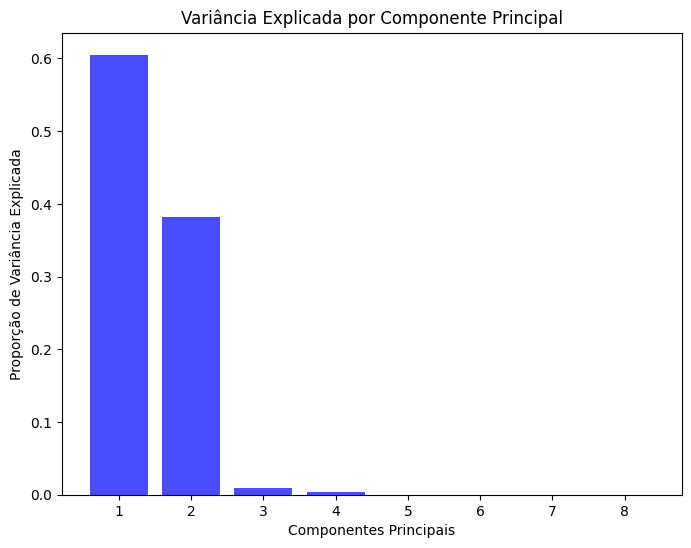

In [13]:
# Plotar a variância explicada por componente principal
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, align='center', color='blue')
plt.ylabel('Proporção de Variância Explicada')
plt.xlabel('Componentes Principais')
plt.title('Variância Explicada por Componente Principal')
plt.show()

In [15]:
# Variância acumulada
explained_variance_cumulative = explained_variance.cumsum()
explained_variance_cumulative

array([0.60519036, 0.98679936, 0.99623882, 0.99978646, 0.99999875,
       0.99999973, 0.99999999, 1.        ])

In [17]:
# Criar DataFrame com as coordenadas dos dois primeiros componentes principais
df_pca = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,-1.435,1.378
1,-1.344,1.566
2,-1.325,1.657
3,-1.349,1.005
4,-1.416,1.189
5,-2.069,-3.536
6,-0.339,-2.440
7,1.379,-1.351
8,3.088,-0.274
9,4.810,0.807


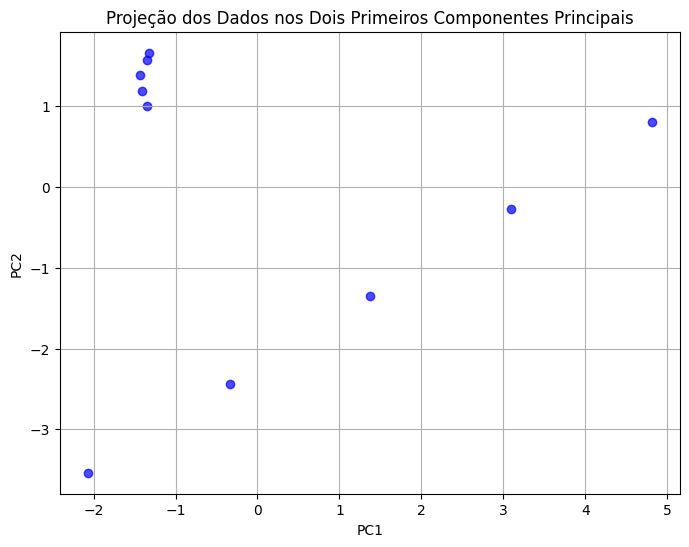

In [18]:
# Visualizar a projeção dos dados nos dois primeiros componentes principais
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7, c='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projeção dos Dados nos Dois Primeiros Componentes Principais')
plt.grid(True)
plt.show()

In [19]:
# Loadings: relação entre os atributos originais e os componentes principais
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(explained_variance))], 
                        index=df.columns)

# Mostrar os loadings dos dois primeiros componentes principais
print(loadings[['PC1', 'PC2']])

                            PC1    PC2
soil_effluent_nitrogen    0.452 -0.064
soil_effluent_phosphorus  0.127  0.540
soil_effluent_potassium   0.453 -0.046
soil_effluent_calcium     0.384  0.302
soil_effluent_culphur    -0.002  0.558
soil_effluent_sodium      0.452 -0.064
soil_effluent_magnesium  -0.141  0.540
soil_effluent_aluminium   0.452 -0.063
